In [14]:
from pycaret.classification import *
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="1"


In [2]:
# Load training set
train = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-17_18-04-22_train.csv' , header=0)
test = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-17_18-04-22_test.csv' , header=0)
val = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-17_18-04-22_val.csv' , header=0)

datasets = [train, test, val]

# Types to filter out. Either bc the information is unimportant or can lead to confusions
filter_values = [
    'http://www.w3.org/2000/01/rdf-schema#subClassOf',
    'no_link_known',
    'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'
]

for value in filter_values:
    test = test[test['ground_truth'] != value]
    val = val[val['ground_truth'] != value]
    train = train[train['ground_truth'] != value]
    
merged_val = pd.concat([test, val], axis=0)

In [3]:
# Matches in natural language the meaning of each point in the embedding space
# This is used to split the results of the clustering by color

nat_lang_match = {
  'http://www.semanticweb.org/needed-terms#001_head': 'Annotation referring to gene',
  'http://semanticscience.org/resource/SIO_000281_head': 'Phenotype Annotation',
  'http://www.semanticweb.org/needed-terms#004_head': 'Development Annotation',
  'http://semanticscience.org/resource/SIO_001279_head': 'Phenotype Annotation',
  'http://www.semanticweb.org/needed-terms#002_head': 'Development Annotation',
  'http://semanticscience.org/resource/SIO_000628_head': 'Interaction Annotation',
  'http://www.semanticweb.org/needed-terms#009_head': 'Disease Annotation',
  'http://www.semanticweb.org/needed-terms#001_tail': 'Gene',
  'http://semanticscience.org/resource/SIO_000281_tail': 'Phenotype',
  'http://www.semanticweb.org/needed-terms#004_tail': 'Expression Pattern',
  'http://semanticscience.org/resource/SIO_001279_tail': 'Phenotype',
  'http://www.semanticweb.org/needed-terms#002_tail': 'Lifestage',
  'http://semanticscience.org/resource/SIO_000628_tail': 'Molecular entity (RNA / DNA / Protein)',
  'http://www.semanticweb.org/needed-terms#009_tail': 'Disease'
}

In [4]:
import pandas as pd

# Assuming the data is already stored in a DataFrame called 'df'
df1 = merged_val.iloc[:, :100]
df2 = merged_val.iloc[:, 100:200]

# add the ground_truth col
df1['ground_truth'] = merged_val['ground_truth'] + '_head'
df2['ground_truth'] = merged_val['ground_truth'] + '_tail'

# drop indexes
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# rename columns of df2 to be the same as df1
df2.columns = df1.columns

# merge the two dataframes
df = pd.concat([df1, df2], axis=0)

# Replace 'ground_truth' col by its natural language meaning
df['ground_truth'] = df['ground_truth'].replace(nat_lang_match)
df = df.drop_duplicates()

df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ground_truth
0,0.007257,0.034391,0.040302,-0.014142,0.043601,0.026042,-0.042320,-0.052182,0.007224,0.059336,...,0.012871,0.054710,0.042389,-0.049623,0.015237,0.053416,-0.054834,-0.040743,-0.033618,Annotation referring to gene
1,-0.017977,0.032711,0.031887,-0.031475,0.039888,0.021578,-0.047201,-0.042827,0.002145,0.049754,...,-0.016514,0.055128,0.027858,-0.036432,0.010550,0.045234,-0.046502,-0.033155,-0.033572,Annotation referring to gene
2,-0.084909,0.114381,-0.204285,0.021392,-0.120028,0.203261,0.172854,0.175367,-0.199627,-0.195778,...,-0.112324,-0.203354,-0.198976,0.210297,0.172055,-0.197412,-0.102028,-0.059177,-0.215393,Phenotype Annotation
3,0.035760,0.007384,-0.013655,-0.016146,-0.023804,-0.048477,0.018814,-0.057360,0.010899,-0.035656,...,0.043426,0.048088,0.044031,-0.033090,-0.034195,0.057572,-0.048521,-0.036058,-0.019724,Development Annotation
4,0.040079,-0.063407,0.071064,-0.052986,-0.053628,-0.071678,-0.058611,0.028115,-0.035865,0.064136,...,0.037738,0.012411,-0.010350,0.021172,-0.061282,0.071117,-0.059580,-0.020190,0.047110,Phenotype Annotation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216363,0.001567,-0.007707,0.029776,-0.035989,0.027740,-0.007739,-0.013399,-0.027885,0.019627,0.020474,...,-0.007516,0.008317,0.035321,-0.018525,0.021948,0.002208,-0.002446,0.006250,0.029001,Phenotype
216519,-0.015393,-0.019007,0.014643,-0.007273,-0.001661,-0.006578,-0.038396,-0.035384,0.027914,0.036704,...,-0.002178,0.004473,0.034223,-0.019620,0.025333,0.019620,-0.002348,0.036360,0.039905,Disease
216857,0.005754,-0.037897,0.014409,-0.023715,0.030995,-0.004737,-0.015752,-0.051217,0.037177,0.038536,...,0.005661,0.017977,0.012613,-0.033657,0.013853,-0.003615,-0.011307,0.010223,0.029038,Gene
216894,-0.016454,-0.028552,0.006792,-0.025513,0.011317,-0.001535,-0.014055,-0.030428,0.031916,0.030638,...,-0.004536,-0.003577,0.007490,-0.012330,0.021245,0.002877,-0.009097,0.019342,-0.006510,Phenotype


In [72]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
numeric_cols = df.drop(['ground_truth'], axis=1)  # Exclude 'ground_truth' and 'link' columns
pca = PCA(n_components=2)  # Specify the number of components you want to keep
pca_result = pca.fit_transform(numeric_cols)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Append 'ground_truth' col to the DataFrame with the PCA features
df_pca.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df_pca['ground_truth'] = df['ground_truth']

In [74]:
# Print all ground_truth values
print(df_pca['ground_truth'].unique())

['Annotation referring to gene' 'Phenotype Annotation'
 'Development Annotation' 'Interaction Annotation' 'Disease Annotation'
 'Gene' 'Phenotype' 'Expression Pattern' 'Lifestage'
 'Molecular entity (RNA / DNA / Protein)' 'Disease']


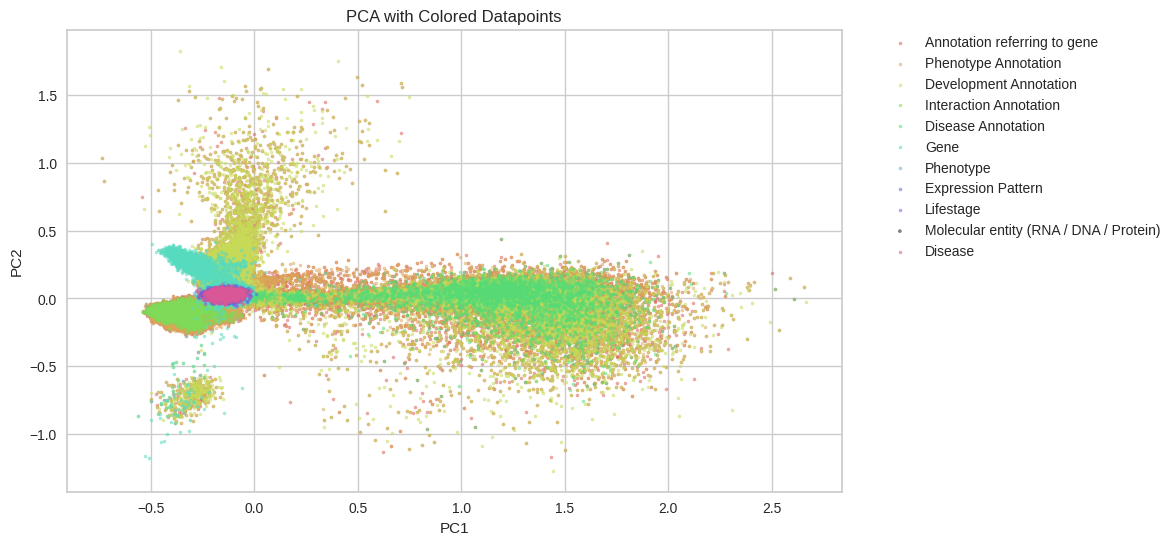

In [77]:
plt.figure(figsize=(10, 6))
unique_values = df_pca['ground_truth'].unique()
num_unique_values = len(unique_values)
palette = sns.color_palette('hls', num_unique_values)  # Use 'hls' color palette for a wide range of colors

for link_value, color in zip(unique_values, palette):
    indices = df_pca['ground_truth'] == link_value
    plt.scatter(df_pca.loc[indices, 'PC1'], df_pca.loc[indices, 'PC2'], c=color, label=link_value, alpha=0.5, s=5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA with Colored Datapoints')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [5]:
from sklearn.manifold import TSNE

numeric_cols = df.drop(['ground_truth'], axis=1)  # Exclude 'ground_truth' and 'link' columns
tsne = TSNE(n_components=2)  # Specify the number of components you want to keep
tsne_result = tsne.fit_transform(numeric_cols)
df_tsne = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

df_tsne.reset_index(drop=True, inplace=True)
gt = df['ground_truth']
gt.reset_index(drop=True, inplace=True)
df_tsne['ground_truth'] = gt
df_tsne



ValueError: cannot reindex on an axis with duplicate labels

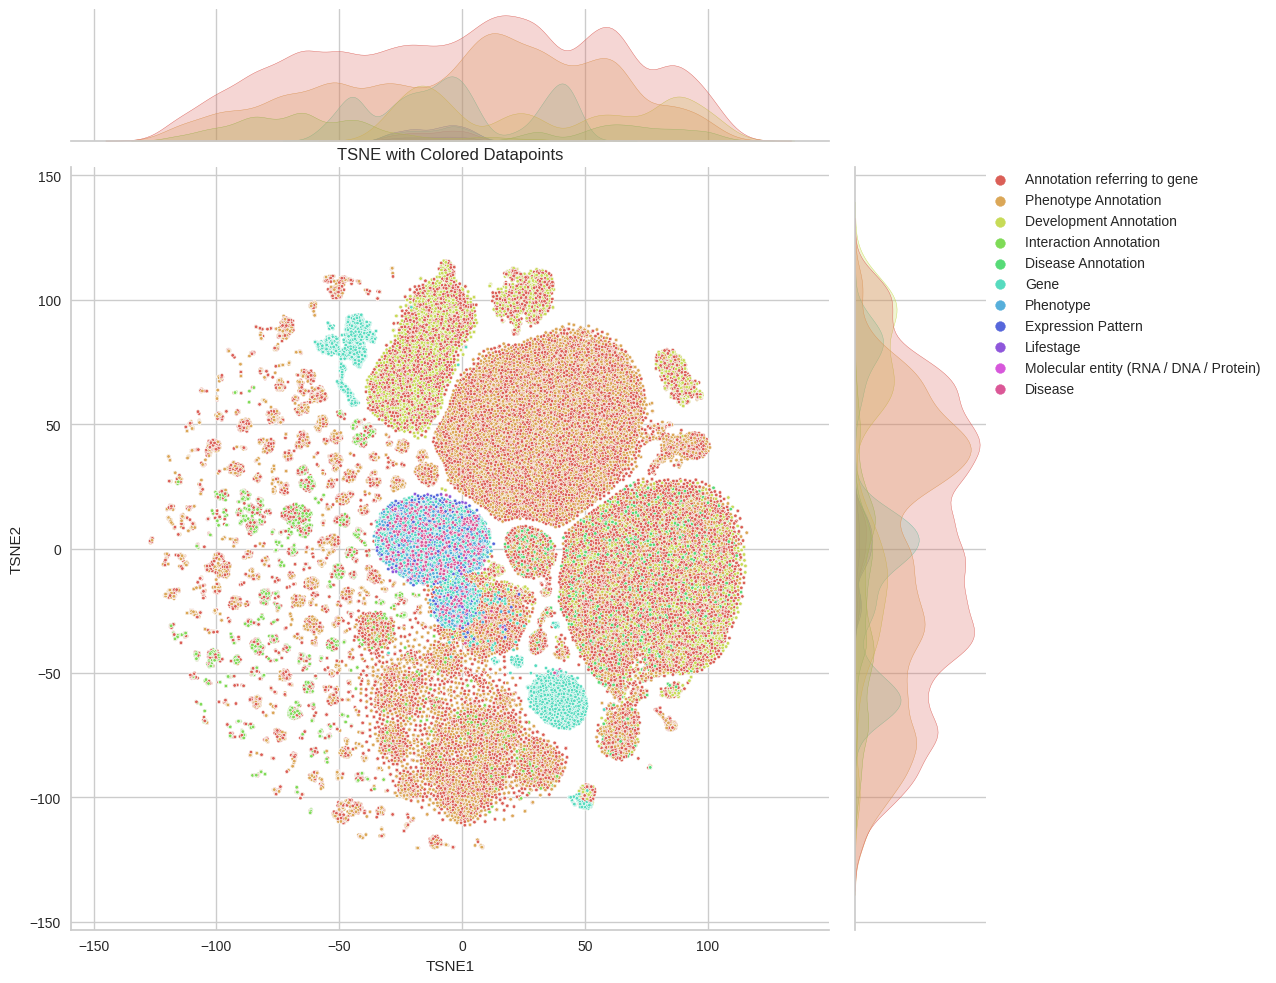

In [58]:
g = sns.jointplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='ground_truth', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('TSNE1', 'TSNE2')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.title('TSNE with Colored Datapoints')
plt.show()


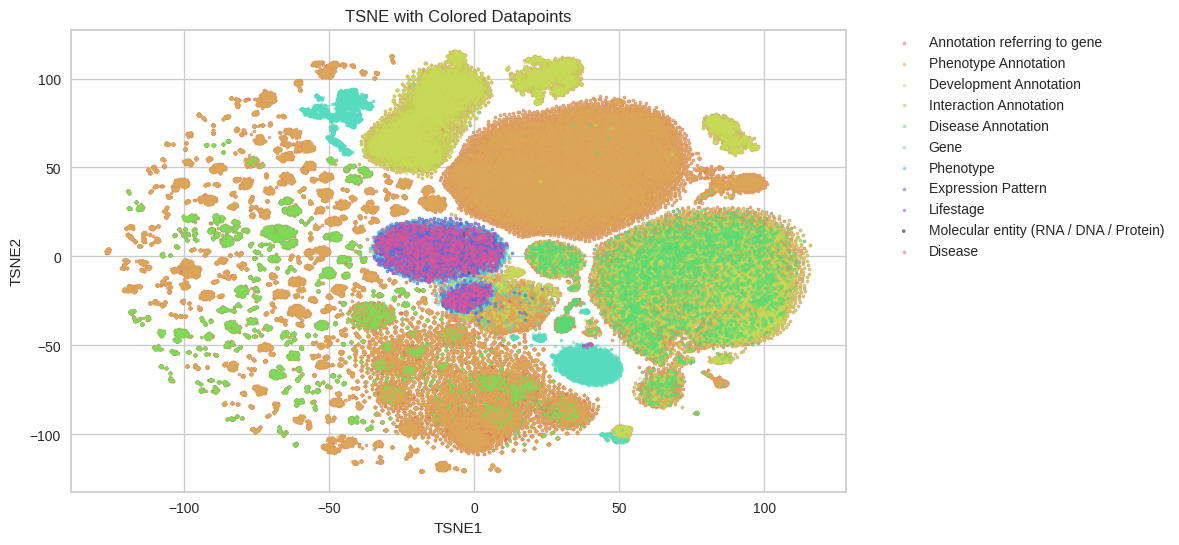

In [ ]:
plt.figure(figsize=(10, 6))
unique_values = df_tsne['ground_truth'].unique()
num_unique_values = len(unique_values)
palette = sns.color_palette('hls', num_unique_values)  # Use 'hls' color palette for a wide range of colors

for link_value, color in zip(unique_values, palette):
    indices = df_tsne['ground_truth'] == link_value
    plt.scatter(df_tsne.loc[indices, 'TSNE1'], df_tsne.loc[indices, 'TSNE2'], c=color, label=link_value, alpha=0.5, s=5)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()
plt.title('TSNE with Colored Datapoints')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [20]:
# Split the DataFrame into two: annotations and entities
df_annotations = df[df['ground_truth'].str.contains('Annotation')]
df_entities = df[~df['ground_truth'].str.contains('Annotation')]

gt_ent = df_entities['ground_truth']
gt_ent.reset_index(drop=True, inplace=True)
gt_annot = df_annotations['ground_truth']
gt_annot.reset_index(drop=True, inplace=True)

In [23]:
numeric_cols = df_annotations.drop(['ground_truth'], axis=1)  # Exclude 'ground_truth' and 'link' columns
tsne = TSNE(n_components=2)  # Specify the number of components you want to keep
tsne_result = tsne.fit_transform(numeric_cols)
df_tsne_annot = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

# Append 'ground_truth' column to the DataFrame with the t-SNE features
df_tsne_annot['ground_truth'] = gt_annot
df_tsne_annot

,TSNE1,TSNE2,ground_truth
0,0.366144,21.754471,Gene
1,25.089651,16.935644,Gene
2,90.053314,10.068717,Phenotype
3,36.770370,-39.999664,Expression Pattern
4,-43.805687,16.907206,Phenotype
...,...,...,...
158728,-44.608070,-33.932304,NaN
158729,22.865095,-68.572731,NaN
158730,62.276920,53.559792,NaN
158731,37.710297,35.238976,NaN


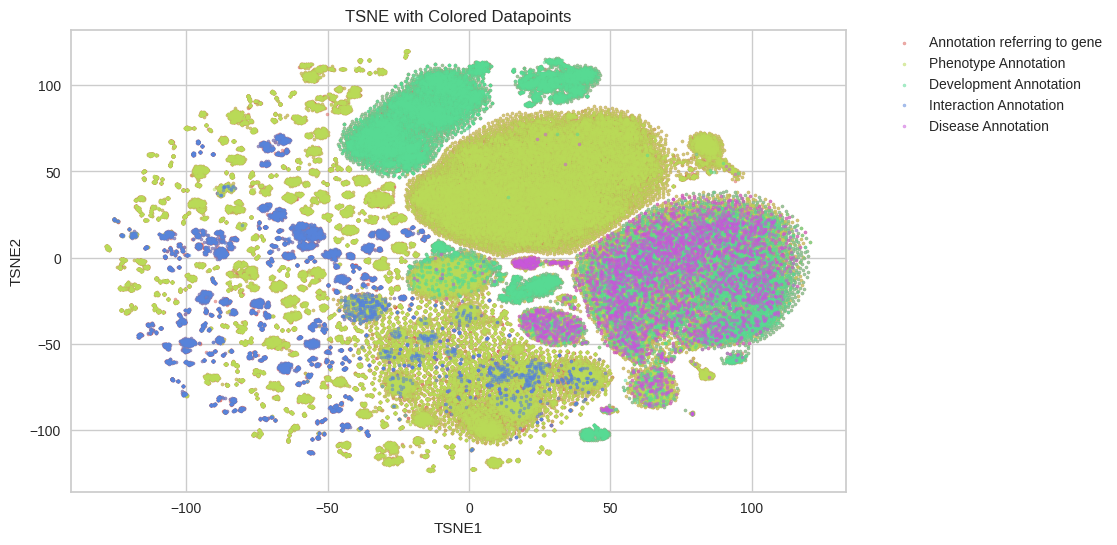

In [42]:
plt.figure(figsize=(10, 6))
unique_values = df_tsne_annot['ground_truth'].unique()
num_unique_values = len(unique_values)
palette = sns.color_palette('hls', num_unique_values)  # Use 'hls' color palette for a wide range of colors

for link_value, color in zip(unique_values, palette):
    indices = df_tsne_annot['ground_truth'] == link_value
    plt.scatter(df_tsne_annot.loc[indices, 'TSNE1'], df_tsne_annot.loc[indices, 'TSNE2'], c=color, label=link_value, alpha=0.5, s=5)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

# Larger legend point size
plt.legend(fontsize='large', markerscale=10, )
plt.title('TSNE with Colored Datapoints')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [25]:
numeric_cols = df_entities.drop(['ground_truth'], axis=1)  # Exclude 'ground_truth' and 'link' columns
tsne = TSNE(n_components=2)  # Specify the number of components you want to keep
tsne_result = tsne.fit_transform(numeric_cols)
df_tsne_ent = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

# Append 'ground_truth' column to the DataFrame with the t-SNE features
df_tsne_ent['ground_truth'] = gt_ent
df_tsne_ent

,TSNE1,TSNE2,ground_truth
0,-1.546305,2.371631,Annotation referring to gene
1,-59.765892,-17.644650,Annotation referring to gene
2,-25.172155,-19.936487,Phenotype Annotation
3,3.636852,-32.162807,Development Annotation
4,-16.119829,33.966976,Phenotype Annotation
...,...,...,...
21767,14.435978,0.454627,Annotation referring to gene
21768,1.336487,-23.375462,Annotation referring to gene
21769,13.916386,14.120310,Phenotype Annotation
21770,-5.253035,7.018708,Development Annotation


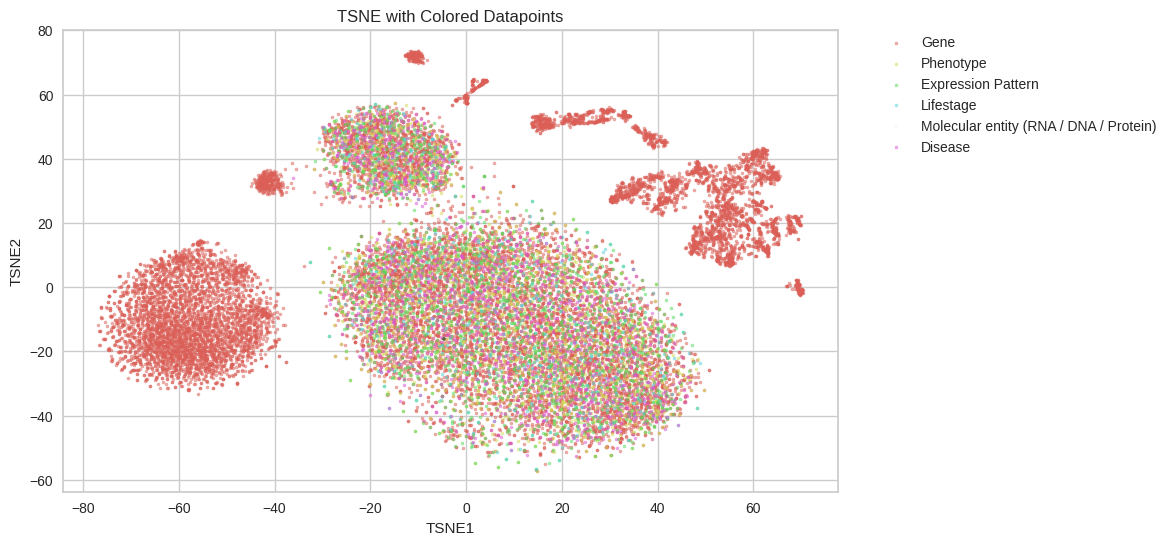

In [49]:
plt.figure(figsize=(10, 6))
unique_values = df_tsne_ent['ground_truth'].unique()
num_unique_values = len(unique_values)
palette = sns.color_palette('hls', num_unique_values)  # Use 'hls' color palette for a wide range of colors

for link_value, color in zip(unique_values, palette):
    indices = df_tsne_ent['ground_truth'] == link_value
    plt.scatter(df_tsne_ent.loc[indices, 'TSNE1'], df_tsne_ent.loc[indices, 'TSNE2'], c=color, label=link_value, alpha=0.5, s=5)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

# Larger legend point size
plt.legend(fontsize='large', markerscale=10, )
plt.title('TSNE with Colored Datapoints')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [60]:
# Types to filter out. Either bc the information is unimportant or can lead to confusions
filter_values = [
    'http://www.w3.org/2000/01/rdf-schema#subClassOf',
    'no_link_known',
    'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'
]

for value in filter_values:
    train = train[train['ground_truth'] != value]

In [61]:

# Assuming the data is already stored in a DataFrame called 'df'
df3 = train.iloc[:, :100]
df4 = train.iloc[:, 100:200]

# add the ground_truth col
df3['ground_truth'] = train['ground_truth'] + '_head'
df4['ground_truth'] = train['ground_truth'] + '_tail'

# drop indexes
df3 = df3.reset_index(drop=True)
df4 = df4.reset_index(drop=True)

# rename columns of df2 to be the same as df1
df4.columns = df1.columns

# merge the two dataframes
df_train = pd.concat([df3, df4], axis=0)

# Replace 'ground_truth' col by its natural language meaning
df_train['ground_truth'] = df_train['ground_truth'].replace(nat_lang_match)
df_train = df_train.drop_duplicates()

df_train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ground_truth
0,-0.025288,0.022737,0.035192,0.024795,0.028920,-0.028636,-0.025980,0.020363,-0.023378,0.032760,...,-0.023339,0.030975,0.027779,0.020138,-0.026146,-0.019438,-0.029262,0.029598,-0.024339,Phenotype Annotation
1,-0.015377,0.030631,0.053401,0.031177,-0.048147,-0.037759,-0.046587,-0.018794,-0.027696,0.039236,...,-0.027962,0.041811,0.043872,-0.032244,-0.036275,-0.029308,-0.040917,0.043283,-0.022732,Annotation referring to gene
2,-0.025694,0.006442,0.052168,-0.019584,0.000848,-0.054846,-0.039739,-0.003980,0.045621,0.048827,...,0.059337,0.051068,0.037774,0.017029,-0.046376,0.062204,-0.058508,-0.021928,0.045503,Annotation referring to gene
3,0.039975,0.036049,0.037306,0.018442,0.038329,-0.052698,-0.041999,-0.018951,-0.005138,-0.004109,...,-0.008193,0.046442,0.034193,0.038820,-0.051400,-0.039438,-0.050315,0.030442,-0.009468,Phenotype Annotation
4,0.032139,0.028935,-0.005414,0.039584,0.047264,-0.044004,-0.036953,0.032446,-0.038505,0.046332,...,-0.036834,0.015022,0.026361,0.039071,-0.040350,0.045059,-0.045302,0.029074,0.035826,Annotation referring to gene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099394,-0.004148,-0.008438,0.000777,-0.020324,0.008585,-0.016798,0.017951,-0.036741,0.021882,-0.003014,...,0.033635,0.022206,-0.007519,-0.024616,0.013387,0.011456,-0.000917,0.018213,0.000249,http://www.w3.org/1999/02/22-rdf-syntax-ns#lab...
1099397,-0.038362,0.023156,0.039261,-0.024205,-0.031574,0.012041,0.027041,0.014175,0.003990,-0.021481,...,0.032369,-0.006690,-0.009714,0.013377,0.022503,0.038114,-0.021144,-0.017828,-0.041560,http://www.w3.org/1999/02/22-rdf-syntax-ns#lab...
1099438,-0.048337,0.023427,0.020222,-0.054998,-0.018661,0.059118,0.049513,-0.045420,-0.029583,-0.007581,...,0.047122,-0.034626,0.038802,-0.034833,-0.048320,0.056302,-0.043579,-0.072765,0.062247,Gene
1099445,-0.004055,-0.017931,0.037241,-0.021354,0.008386,-0.035662,-0.025788,-0.032106,0.011783,0.041544,...,0.012532,0.032688,-0.005973,-0.028449,0.028655,0.022893,-0.021190,0.003605,-0.006896,http://www.w3.org/1999/02/22-rdf-syntax-ns#lab...


In [62]:
from sklearn.manifold import TSNE

numeric_cols = df_train.drop(['ground_truth'], axis=1)  # Exclude 'ground_truth' and 'link' columns
tsne = TSNE(n_components=2)  # Specify the number of components you want to keep
tsne_result = tsne.fit_transform(numeric_cols)
df_train_tsne = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])


df_train_tsne.reset_index(drop=True, inplace=True)
gt_train = df['ground_truth']
gt_train.reset_index(drop=True, inplace=True)
df_train_tsne['ground_truth'] = gt_train
df_train_tsne


In [ ]:
g = sns.jointplot(data=df_train_tsne, x='TSNE1', y='TSNE2', hue='ground_truth', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('TSNE1', 'TSNE2')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.title('TSNE with Colored Datapoints')
plt.show()